<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/Helping_Farmer_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#This project from colab, the url of project is https://www.kaggle.com/competitions/helping-farmers/leaderboard, so in this link it is easy to download CSV files.

The target of this project is Yield which is a continuous value, so we have to select regression for modelling. And the only column which requires to convert is PI. Therefore, some additional preprocessing would be essential for this project.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/Farming")

In [6]:
test_file='data_test.csv'
train_file='data_train.csv'
y_test_path='sample_submissions.csv'
df_test=pd.read_csv(test_file)
df_train=pd.read_csv(train_file)
y_test=pd.read_csv(y_test_path)

In [7]:
X_test=df_test.copy()

In [8]:
y_test=y_test['Yield']

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               870 non-null    int64  
 1   Experiment       870 non-null    object 
 2   Variety          870 non-null    object 
 3   Planting date    870 non-null    object 
 4   Location         870 non-null    int64  
 5   Latitude         870 non-null    float64
 6   Longitude        870 non-null    float64
 7   Temperature      870 non-null    float64
 8   Precipitation    870 non-null    float64
 9   Solar Radiation  870 non-null    int64  
 10  Soil class       870 non-null    int64  
 11  CEC              870 non-null    float64
 12  Organic matter   870 non-null    float64
 13  pH               870 non-null    float64
 14  Clay             870 non-null    float64
 15  Silt             870 non-null    float64
 16  Sand             870 non-null    float64
 17  PI              

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81166 entries, 0 to 81165
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               81166 non-null  int64  
 1   Experiment       81166 non-null  object 
 2   Variety          81166 non-null  object 
 3   Planting date    81166 non-null  object 
 4   Location         81166 non-null  int64  
 5   Latitude         81166 non-null  float64
 6   Longitude        81166 non-null  float64
 7   Temperature      81166 non-null  float64
 8   Precipitation    81166 non-null  float64
 9   Solar Radiation  81166 non-null  int64  
 10  Soil class       81166 non-null  int64  
 11  CEC              81166 non-null  float64
 12  Organic matter   81166 non-null  float64
 13  pH               81166 non-null  float64
 14  Clay             81166 non-null  float64
 15  Silt             81166 non-null  float64
 16  Sand             81166 non-null  float64
 17  PI          

In [11]:
df_train.isna().sum()

ID                 0
Experiment         0
Variety            0
Planting date      0
Location           0
Latitude           0
Longitude          0
Temperature        0
Precipitation      0
Solar Radiation    0
Soil class         0
CEC                0
Organic matter     0
pH                 0
Clay               0
Silt               0
Sand               0
PI                 0
Yield              0
dtype: int64

In [12]:
df_train.describe()

,ID,Location,Latitude,Longitude,Temperature,Precipitation,Solar Radiation,Soil class,CEC,Organic matter,pH,Clay,Silt,Sand,Yield
count,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000,8.116600e+04,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000,81166.000000
mean,40583.500000,2540.050452,41.786226,-90.452550,3432.766644,653.758462,1.060948e+06,179.319555,26.068651,5.505636,6.323124,25.095255,49.904295,24.982227,58.999719
std,23430.750312,752.287221,1.366625,4.618686,260.702592,140.439985,4.390120e+04,56.368637,2.547760,1.737181,0.232910,3.120789,9.816227,11.145036,11.421145
min,1.000000,1206.000000,38.752120,-101.766594,2819.900000,287.500000,9.826730e+05,111.000000,16.596552,2.009541,5.498863,17.289116,28.951389,3.092954,0.830000
25%,20292.250000,2200.000000,40.699070,-93.845798,3221.500000,561.700000,1.030575e+06,113.000000,24.489945,4.301854,6.152467,22.790220,42.091649,15.403863,51.630000
50%,40583.500000,2440.000000,41.518148,-91.406840,3441.450000,659.100000,1.054598e+06,212.000000,26.130715,4.782916,6.242766,25.418764,49.774884,24.120515,59.270000
75%,60874.750000,3270.000000,42.932768,-87.792660,3615.400000,745.500000,1.074860e+06,213.000000,27.253545,6.602643,6.491298,27.109881,58.171803,34.990946,66.710000
max,81166.000000,3503.000000,44.994802,-76.532786,4201.300000,1109.700000,1.217102e+06,333.000000,32.196832,14.089472,7.071231,35.973524,69.942998,51.228458,120.600000


In [13]:
df_train.head(3)

,ID,Experiment,Variety,Planting date,Location,Latitude,Longitude,Temperature,Precipitation,Solar Radiation,Soil class,CEC,Organic matter,pH,Clay,Silt,Sand,PI,Yield
0,1,09SUBWYG201,V000047,5/20/2009,2291,42.019111,-93.525735,3319.8,762.3,1078880,122,29.248626,4.468491,6.28384,25.90531,42.428096,31.686198,15,55.62
1,2,09SUBWYG202,V000047,5/20/2009,2291,42.019111,-93.525735,3319.8,762.3,1078880,122,29.248626,4.468491,6.28384,25.90531,42.428096,31.686198,15,53.72
2,3,09SUBWYG203,V000047,5/20/2009,2291,42.019111,-93.525735,3319.8,762.3,1078880,122,29.248626,4.468491,6.28384,25.90531,42.428096,31.686198,15,49.09


In [14]:
df_train.apply(lambda x : len(x.unique()))
#show the different value of each column

ID                 81166
Experiment          4197
Variety              174
Planting date        244
Location             205
Latitude             587
Longitude            582
Temperature          574
Precipitation        553
Solar Radiation      587
Soil class            23
CEC                  244
Organic matter       244
pH                   244
Clay                 243
Silt                 244
Sand                 244
PI                    11
Yield               6189
dtype: int64

In [15]:
X_train=df_train.iloc[:,7:18]
y_train=df_train['Yield']# Create our Target

In [16]:
X_train.columns

Index(['Temperature', 'Precipitation', 'Solar Radiation', 'Soil class', 'CEC',
       'Organic matter', 'pH', 'Clay', 'Silt', 'Sand', 'PI'],
      dtype='object')

In [17]:
X_test=df_test.iloc[:,7:18]

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81166 entries, 0 to 81165
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      81166 non-null  float64
 1   Precipitation    81166 non-null  float64
 2   Solar Radiation  81166 non-null  int64  
 3   Soil class       81166 non-null  int64  
 4   CEC              81166 non-null  float64
 5   Organic matter   81166 non-null  float64
 6   pH               81166 non-null  float64
 7   Clay             81166 non-null  float64
 8   Silt             81166 non-null  float64
 9   Sand             81166 non-null  float64
 10  PI               81166 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 6.8+ MB


In [19]:
X_train['PI'].unique()

array(['15', '14', '13', '.', '10', '16', '9', '12', '11', '17', '18'],
      dtype=object)

In [20]:
((X_train['PI'].apply(lambda x:x=='.').sum())/len(X_train['PI']))*100

9.452233693911245

In [21]:
Repl_PI=X_train['PI'].mode()
Repl_PI[0]


'14'

In [22]:
((X_train['PI'].apply(lambda x:x=='14').sum())/len(X_train['PI']))*100

37.030283616292536

In [23]:
Repl_PI_test=X_test['PI'].mode()
Repl_PI_test[0]

'15'

In [24]:
for i in range(len(X_train)):
    if(X_train.iloc[i]['PI']=='.'):
        X_train.loc[i:i,'PI']=Repl_PI[0]


In [25]:
((X_train['PI'].apply(lambda x:x=='.').sum())/len(X_train['PI']))*100

0.0

In [26]:
for i in range(len(X_test)):
    if(X_test.iloc[i]['PI']=='.'):
        X_test.loc[i:i,'PI']=Repl_PI_test[0]

In [27]:
X_train['PI'].unique()

array(['15', '14', '13', '10', '16', '9', '12', '11', '17', '18'],
      dtype=object)

In [28]:
X_train['PI']=X_train['PI'].astype(float)

In [29]:
X_test['PI']=X_test['PI'].astype(float)

In [30]:
print(set(y_train))# it shows that we could not use this data for classfication

{15.14, 16.25, 17.89, 18.42, 19.5, 18.25, 21.67, 20.64, 23.92, 23.75, 25.72, 24.25, 24.0, 28.0, 26.75, 30.08, 26.5, 27.25, 33.45, 28.75, 29.5, 36.3, 37.41, 38.91, 39.64, 39.41, 40.97, 41.95, 42.89, 44.7, 36.0, 46.19, 47.69, 46.44, 48.42, 48.92, 47.41, 49.66, 50.39, 49.16, 49.09, 55.95, 50.69, 50.44, 59.03, 59.53, 59.16, 62.92, 55.69, 64.54, 64.0, 65.61, 66.15, 68.84, 69.91, 70.64, 70.39, 72.06, 68.05, 74.75, 74.14, 76.86, 77.57, 78.67, 78.08, 77.88, 81.29, 82.5, 80.66, 79.3, 84.89, 83.77, 82.1, 88.2, 89.27, 90.42, 88.02, 90.67, 90.91, 93.9, 95.72, 93.56, 97.51, 96.61, 96.15, 100.93, 98.29, 99.52, 97.4, 97.29, 105.77, 99.97, 102.45, 100.48, 106.52, 101.41, 111.63, 103.31, 108.95, 105.31, 111.99, 111.78, 113.5, 117.47, 115.69, 120.09, 114.03, 115.05, 114.28, 120.6, 25.75, 25.5, 28.5, 29.75, 29.25, 30.75, 30.5, 30.0, 30.25, 31.5, 31.0, 32.5, 32.75, 32.25, 33.25, 33.75, 34.25, 34.75, 34.0, 34.5, 35.75, 35.5, 35.0, 35.25, 36.75, 36.5, 36.25, 37.75, 37.25, 37.0, 37.5, 38.75, 38.25, 38.5, 38.

In [31]:
import xgboost as xgb

In [32]:
data_matrix = xgb.DMatrix(data=X_train, label=y_train)# data is features and label is target in XGB function

In [33]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.5, learning_rate=0.8, max_depth=5, n_estimators=20, verbosity=3)

In [34]:
xg_reg.fit(X_train, y_train)

[19:18:55] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[19:18:55] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[19:18:55] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[19:18:55] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[19:18:56] INFO: ../src/tree/updater_pr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.8, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
X_train.shape

(81166, 11)

In [36]:
X_test.shape

(870, 11)

In [37]:
X_train.columns

Index(['Temperature', 'Precipitation', 'Solar Radiation', 'Soil class', 'CEC',
       'Organic matter', 'pH', 'Clay', 'Silt', 'Sand', 'PI'],
      dtype='object')

In [38]:
X_test.columns

Index(['Temperature', 'Precipitation', 'Solar Radiation', 'Soil class', 'CEC',
       'Organic matter', 'pH', 'Clay', 'Silt', 'Sand', 'PI'],
      dtype='object')

In [39]:
y_pred = xg_reg.predict(X_test)

In [40]:
from sklearn import metrics

In [41]:
metrics.mean_absolute_error(y_test, y_pred)

11.495179174572039

In [42]:
X_test.head(5)

,Temperature,Precipitation,Solar Radiation,Soil class,CEC,Organic matter,pH,Clay,Silt,Sand,PI
0,3364.0,624.6,1033691,223,21.999132,9.265318,6.509238,21.612052,35.692853,42.609737,11.0
1,3331.9,624.0,1053394,111,26.702329,10.415804,6.707646,22.790220,43.608001,33.665365,15.0
2,3331.9,624.0,1053394,223,25.074243,9.280525,6.694126,21.596407,43.382442,34.990946,15.0
3,3268.4,772.9,1095251,223,23.820385,9.519349,6.793200,20.138817,42.500796,37.394531,15.0
4,3533.4,843.1,1055041,211,25.155454,8.722878,6.193027,21.244430,53.875289,24.882812,16.0


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'Solar Radiation'}>],
       [<Axes: title={'center': 'Soil class'}>,
        <Axes: title={'center': 'CEC'}>,
        <Axes: title={'center': 'Organic matter'}>],
       [<Axes: title={'center': 'pH'}>, <Axes: title={'center': 'Clay'}>,
        <Axes: title={'center': 'Silt'}>],
       [<Axes: title={'center': 'Sand'}>, <Axes: title={'center': 'PI'}>,
        <Axes: >]], dtype=object)

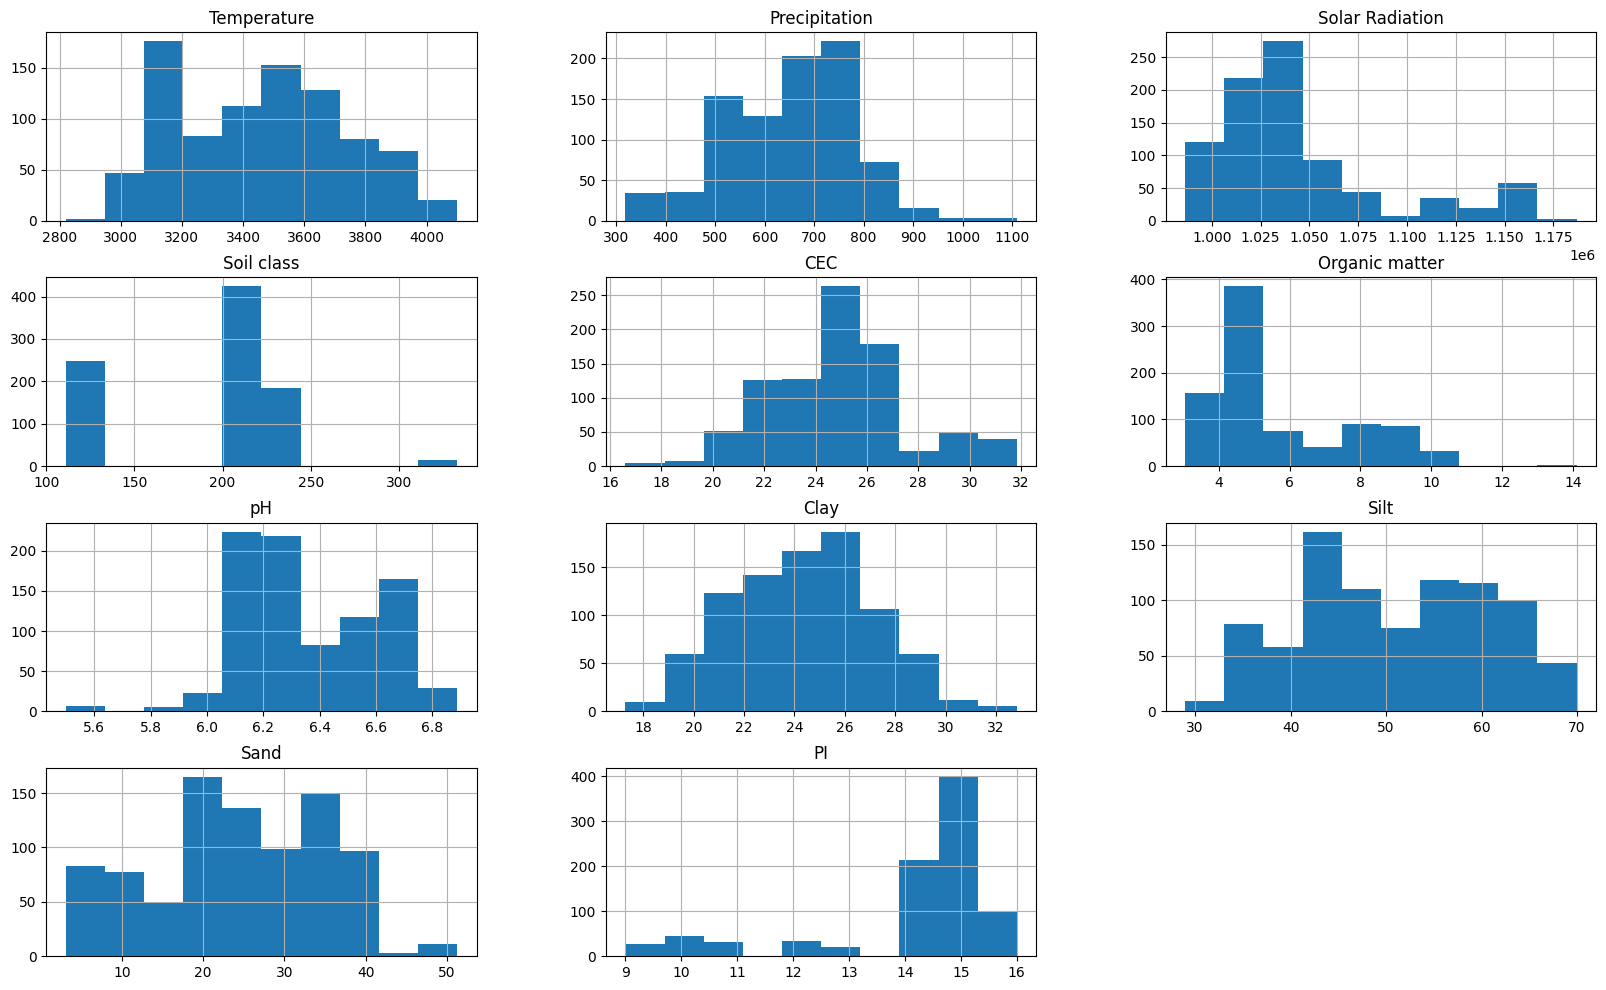

In [46]:
X_test.hist(figsize=(20,12))

In [47]:
X_test.columns

Index(['Temperature', 'Precipitation', 'Solar Radiation', 'Soil class', 'CEC',
       'Organic matter', 'pH', 'Clay', 'Silt', 'Sand', 'PI'],
      dtype='object')

In [94]:
def get_specefic_value_farme(test_dataframe_name):
  Temperature=float(input("please insert a valid Temperature:"))
  Precipitation=float(input("please insert a valid Precipitation:"))
  Solar=float(input("please insert a valid Solar Radiation:"))
  Soil=float(input("please insert a valid Soil_class:"))
  CEC=float(input("please insert a valid CEC:"))
  Organic=float(input("please insert a valid Organic matter:"))
  PH=float(input("please insert a valid PH:"))
  Clay=float(input("please insert a valid Clay:"))
  Silt=float(input("please insert a valid Silt:"))
  Sand=float(input("please insert a valid Sand:"))
  PI=float(input("please insert a valid PI:"))
  farme_data=dict()
  farme_data['Temperature']=Temperature
  farme_data['Precipitation']=Precipitation
  farme_data['Solar Radiation']=Solar
  farme_data['Soil class']=Soil
  farme_data['CEC']=CEC
  farme_data['Organic matter']=Organic
  farme_data['pH']=PH
  farme_data['Clay']=Clay
  farme_data['Silt']=Silt
  farme_data['Sand']=Sand
  farme_data['PI']=PI

  # df_new_data_faram = pd.DataFrame(farme_data, columns=test_dataframe_name.columns)
  return farme_data



In [97]:
new_data_farme=get_specefic_value_farme(X_test)

please insert a valid Temperature:3420
please insert a valid Precipitation:720
please insert a valid Solar Radiation:1.038
please insert a valid Soil_class:215
please insert a valid CEC:25
please insert a valid Organic matter:5
please insert a valid PH:6.3
please insert a valid Clay:21
please insert a valid Silt:44
please insert a valid Sand:23
please insert a valid PI:10.5


In [98]:
print (new_data_farme)

{'Temperature': 3420.0, 'Precipitation': 720.0, 'Solar Radiation': 1.038, 'Soil class': 215.0, 'CEC': 25.0, 'Organic matter': 5.0, 'pH': 6.3, 'Clay': 21.0, 'Silt': 44.0, 'Sand': 23.0, 'PI': 10.5}


In [99]:
df2=pd.DataFrame.from_dict([new_data_farme])

In [100]:
df2

,Temperature,Precipitation,Solar Radiation,Soil class,CEC,Organic matter,pH,Clay,Silt,Sand,PI
0,3420.0,720.0,1.038,215.0,25.0,5.0,6.3,21.0,44.0,23.0,10.5


In [101]:
y_pred2 = xg_reg.predict(df2)

In [102]:
y_pred2

array([58.07749], dtype=float32)

<Axes: >

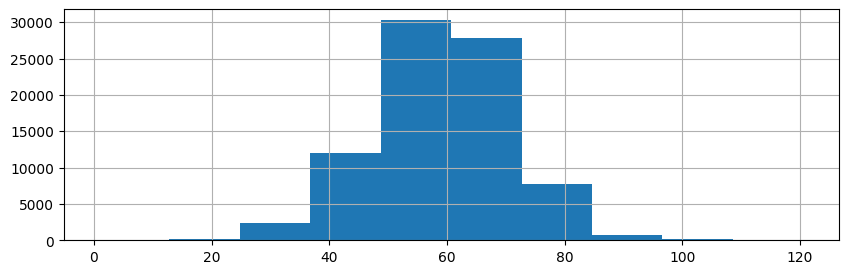

In [108]:
df_train['Yield'].hist(figsize=(10,3))